
# Proyecto Final – Parte II – Estudio de Modelos Analíticos  
**Alumno:** Tobias Villarruel  
**Curso:** Data Science 1 – Coderhouse (Argentina)  
**Dataset:** Air Quality (UCI)  
**Archivo:** `ProyectoDSParteII_Villarruel.ipynb`

---

## Abstract

El presente trabajo corresponde al cuarto avance del proyecto final del curso *Data Science 1* dictado por **Coderhouse**. En esta instancia se amplía el análisis exploratorio de la Parte I, complementando la interpretación de los resultados con un enfoque analítico y de negocio.  
El dataset empleado, **Air Quality (UCI)**, contiene registros horarios de contaminantes atmosféricos (CO, NOx, NO₂, C₆H₆) y variables meteorológicas (Temperatura, Humedad Relativa y Humedad Absoluta), medidos en una estación de monitoreo ubicada en Italia.

El objetivo es comprender las interrelaciones entre las variables meteorológicas y los niveles de contaminación, y proponer posibles modelos analíticos que permitan anticipar condiciones de mala calidad del aire.  
A partir de los resultados obtenidos en el análisis exploratorio, se presentan recomendaciones basadas en evidencias empíricas y se definen las bases conceptuales de aprendizaje supervisado para futuros modelos predictivos.



## Objetivo
Evaluar las relaciones entre variables meteorológicas y contaminantes atmosféricos, identificando patrones que permitan proponer modelos analíticos predictivos de la calidad del aire.

## Contexto Comercial
La contaminación atmosférica constituye un desafío global que afecta la salud pública y la planificación urbana. Las empresas y organismos de monitoreo ambiental requieren herramientas analíticas que permitan anticipar episodios de contaminación y tomar medidas preventivas.

## Problema Comercial
Las entidades encargadas del monitoreo ambiental enfrentan dificultades para identificar qué factores meteorológicos influyen más directamente en la variación de los contaminantes. La ausencia de modelos analíticos limita la capacidad de respuesta y dificulta la toma de decisiones en tiempo real.

## Contexto Analítico
El análisis se desarrolla sobre el dataset **Air Quality (UCI)**, que contiene más de 9.000 registros horarios de gases contaminantes y condiciones meteorológicas. El enfoque metodológico incluye una etapa de **Exploratory Data Analysis (EDA)** y la formulación de **modelos supervisados** de predicción, con énfasis en la variable **CO(GT)** como indicador de contaminación atmosférica.


## Carga y preparación de los datos

In [1]:

import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/tobyvillarruelsoto-droid/Data-Science-1/main/Data%20Science%201%20Villarruel/data/raw/air_quality.csv"

df = pd.read_csv(url, sep=";", encoding="latin1")
df = df.loc[:, ~df.columns.str.contains("Unnamed")]
df = df.replace(-200, np.nan)
df.columns = df.columns.str.strip()

df["Time"] = df["Time"].astype(str).str.replace(".", ":", regex=False)
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S", errors="coerce")

cols_to_convert = [c for c in df.columns if c not in ["Date", "Time", "Datetime"]]
for c in cols_to_convert:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(",", ".").str.replace(" ", ""), errors="coerce")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9471 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Datetime       9357 n


## Exploratory Data Analysis (EDA)
El análisis exploratorio permite visualizar el comportamiento general de las variables y evaluar las relaciones más relevantes entre los contaminantes y las condiciones meteorológicas.


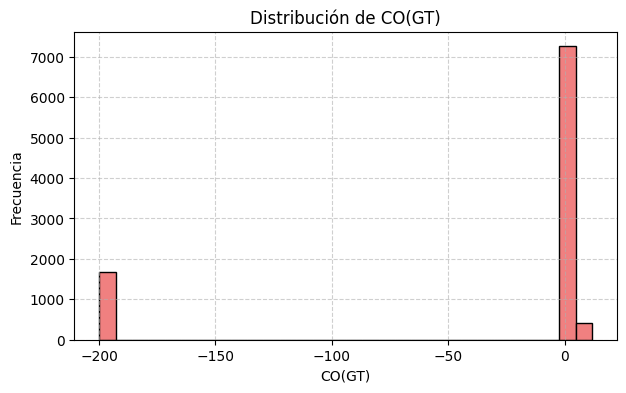

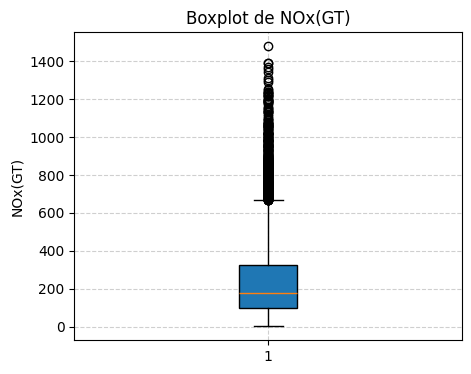

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
plt.hist(df["CO(GT)"].dropna(), bins=30, color="lightcoral", edgecolor="black")
plt.title("Distribución de CO(GT)")
plt.xlabel("CO(GT)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(5,4))
plt.boxplot(df["NOx(GT)"].dropna(), vert=True, patch_artist=True)
plt.title("Boxplot de NOx(GT)")
plt.ylabel("NOx(GT)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


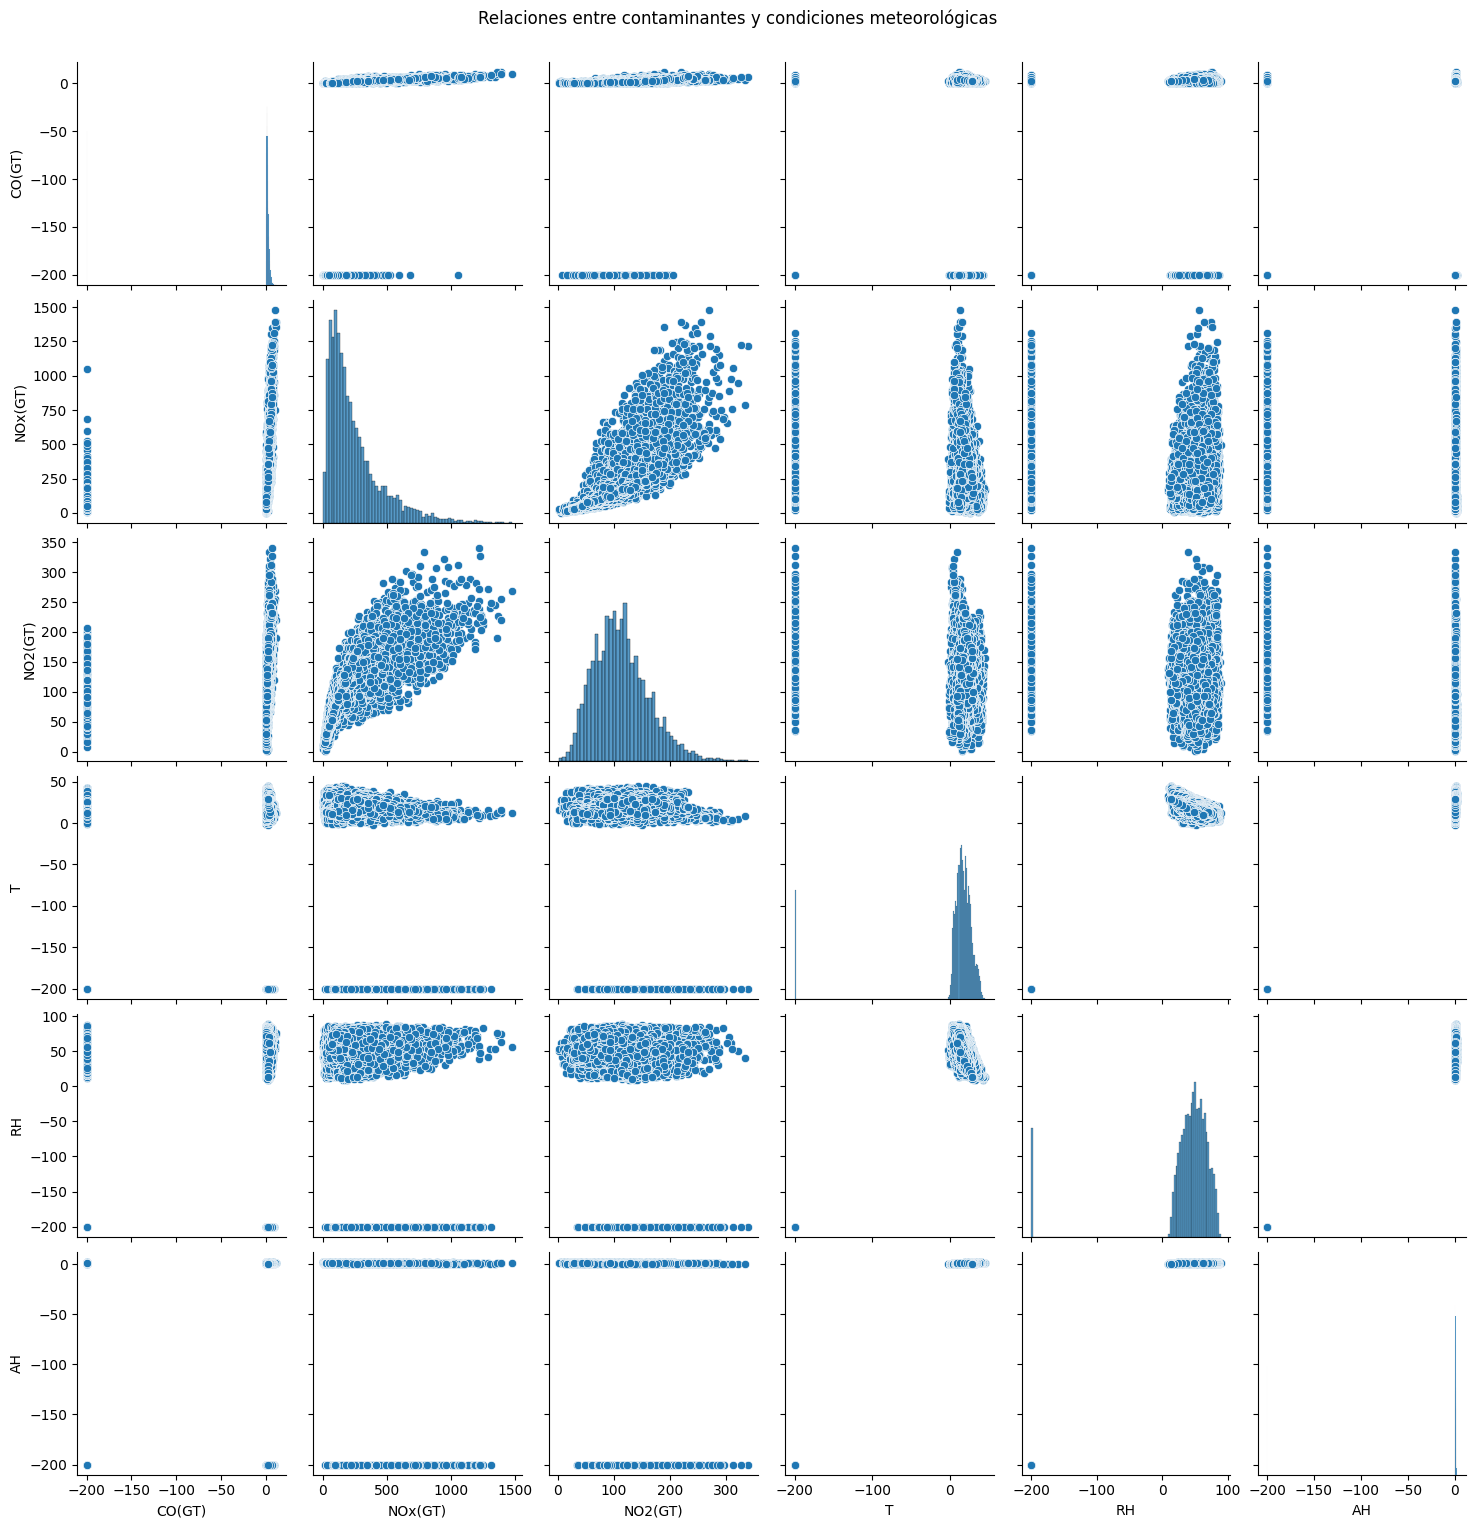

In [3]:

sns.pairplot(df[["CO(GT)", "NOx(GT)", "NO2(GT)", "T", "RH", "AH"]].dropna())
plt.suptitle("Relaciones entre contaminantes y condiciones meteorológicas", y=1.02)
plt.show()


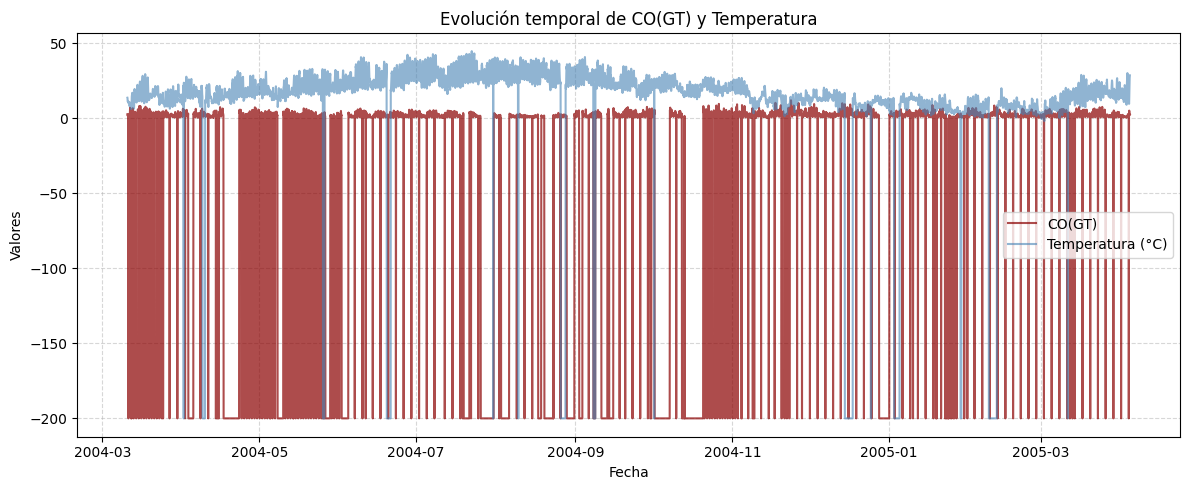

In [4]:

plt.figure(figsize=(12,5))
plt.plot(df["Datetime"], df["CO(GT)"], label="CO(GT)", color="darkred", alpha=0.7)
plt.plot(df["Datetime"], df["T"], label="Temperatura (°C)", color="steelblue", alpha=0.6)
plt.title("Evolución temporal de CO(GT) y Temperatura")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


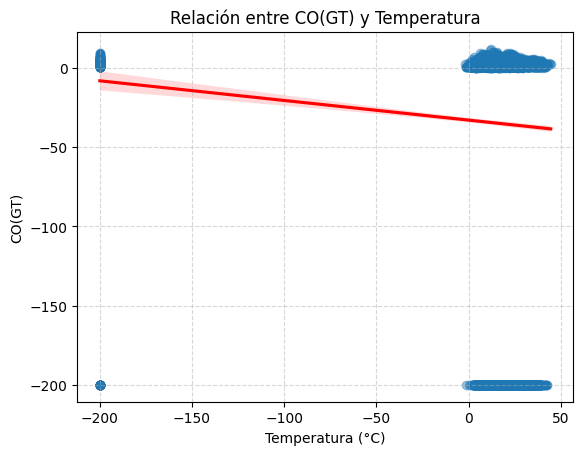

In [5]:

sns.regplot(x="T", y="CO(GT)", data=df, scatter_kws={"alpha":0.4}, line_kws={"color":"red"})
plt.title("Relación entre CO(GT) y Temperatura")
plt.xlabel("Temperatura (°C)")
plt.ylabel("CO(GT)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


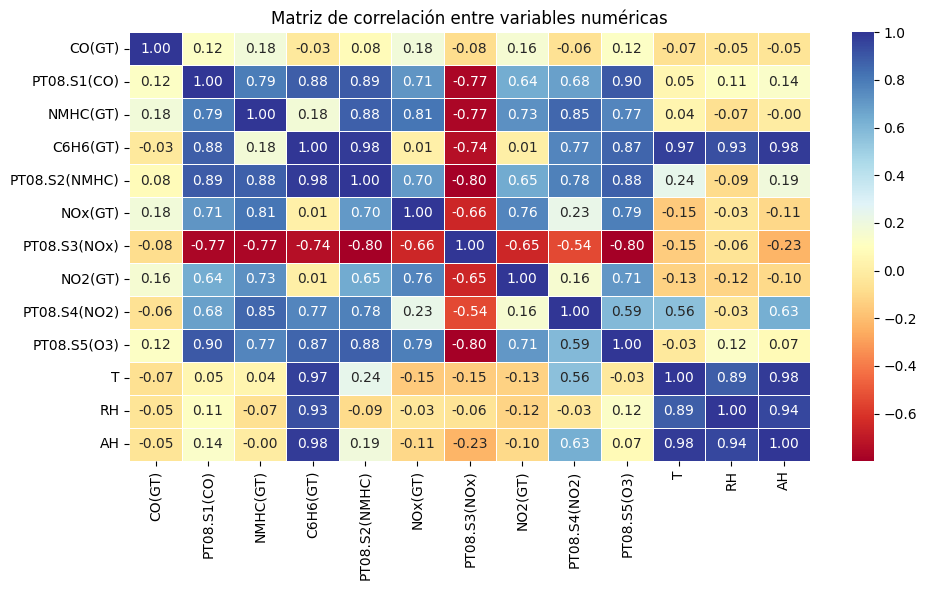

In [6]:

corr = df.select_dtypes(include=["float64"]).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="RdYlBu", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()



## Recomendaciones basadas en insights observados
1. **Condiciones meteorológicas críticas:** Las concentraciones de CO(GT) aumentan en períodos de baja temperatura y humedad relativa. Se recomienda reforzar el monitoreo en días fríos y secos.  
2. **Variables redundantes:** La alta correlación entre NOx(GT) y NO2(GT) sugiere que una de las dos puede servir como indicador sustituto.  
3. **Modelos predictivos:** Dada la relación entre variables meteorológicas y contaminantes, se recomienda implementar modelos de regresión múltiple.  
4. **Alertas tempranas:** Los gráficos temporales muestran ciclos repetitivos en CO(GT). Se sugiere implementar modelos de series temporales para anticipar picos de contaminación.



## Tipo de aprendizaje y propuesta de modelos
El problema se enmarca dentro del **aprendizaje supervisado**, ya que se busca predecir una variable continua (**CO(GT)**) a partir de variables independientes meteorológicas.  
Los modelos más adecuados son:

- **Regresión Lineal Múltiple:** modelo base para relaciones lineales.  
- **Árbol de Decisión:** captura relaciones no lineales.  
- **Random Forest:** ensamble que mejora el desempeño y reduce el sobreajuste.  
- **Modelos de Series Temporales:** útiles para pronosticar variaciones horarias y diarias.



## Conclusiones
Este trabajo consolida el análisis iniciado en la Parte I incorporando una visión analítica orientada al modelado predictivo.  
Los resultados del EDA muestran patrones coherentes con la literatura ambiental: los contaminantes aumentan con baja temperatura y humedad.  
La identificación de correlaciones entre gases contaminantes y variables meteorológicas respalda la posibilidad de construir modelos predictivos confiables.  

El próximo paso consistirá en implementar modelos de regresión múltiple y árboles de decisión, evaluando métricas de desempeño (R², RMSE) y validación cruzada, con el fin de desarrollar un sistema de alerta temprana para la calidad del aire.
